# Case Study : Predicting House Price using Regression Models.


In [2]:
# The code was removed by Watson Studio for sharing.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


#### For linear Regression we will consider the sqft_lot15 which implies total area of the lot  in square feet and price.

### Taking train dataframe !

In [4]:

body = client_13fd72fa0ba04f0ba9cdcb0b3fb3b215.get_object(Bucket='predictinghousepriceunivwashinton-donotdelete-pr-pn7yrxnocamtjz',Key='kc_house_train_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)
df_train.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
import numpy as np
X_train = np.asarray(df_train[['sqft_living']])
X_train[0:5]

array([[1180],
       [2570],
       [ 770],
       [1960],
       [1680]])

In [32]:
y_train = np.asarray(df_train[['price']])
y_train[0:5]

array([[ 221900.],
       [ 538000.],
       [ 180000.],
       [ 604000.],
       [ 510000.]])

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Coefficient :', regr.coef_)
print('Intercept :', regr.intercept_)

Coefficient : [[ 281.95883963]]
Intercept : [-47116.07907289]


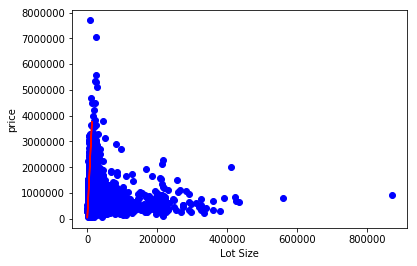

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df_train.sqft_lot15, df_train.price, color = 'blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("Lot Size")
plt.ylabel("price")
plt.show()

In [35]:

body = client_13fd72fa0ba04f0ba9cdcb0b3fb3b215.get_object(Bucket='predictinghousepriceunivwashinton-donotdelete-pr-pn7yrxnocamtjz',Key='kc_house_test_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


In [36]:
X_test = np.asarray(df_test[['sqft_living']])
X_test[0:5]

array([[1430],
       [2950],
       [1710],
       [2320],
       [1090]])

In [37]:
y_test = np.asarray(df_test[['price']])
y_test[0:5]

array([[ 310000.],
       [ 650000.],
       [ 233000.],
       [ 580500.],
       [ 535000.]])

In [38]:
y_hat = regr.predict(X_test)
y_hat[0:5]

array([[ 356085.0615985 ],
       [ 784662.49783662],
       [ 435033.53669499],
       [ 607028.4288695 ],
       [ 260219.05612418]])

# predicting test data and finding r2_score


In [39]:
from sklearn.metrics import r2_score
print("Mean absolute error : %s" % np.mean(np.absolute(y_hat - y_test)))
print ("Residual sum of square (MSE): %s" % + np.mean((y_hat - y_test)**2))
print ("R2-score:%s" % + r2_score(y_hat , y_test))

Mean absolute error : 171921.13562
Residual sum of square (MSE): 65122471888.8
R2-score:0.000321463503237
